# Interpolation to regular grid with KDTree

### Getting the data

##### Please look at the information in the `get_data.ipynb` notebook. You have to end up with `swift.dkrz.de` folder located somwere in your system. All data used in this examples are located in this folder.  

This method should only be used for basic visualization purposes, don't really trust the values that you get :)

In [1]:
import sys
sys.path.append("../")

from netCDF4 import Dataset, MFDataset
import pyfesom as pf
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
from matplotlib import cm

/mnt/lustre01/work/ab0995/a270088/miniconda2/envs/py35/lib/python3.5/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
basedir = '/mnt/lustre01/work/ab0995/a270088/DATA/swift.dkrz.de/'

Load mesh

In [3]:
meshpath  = basedir+'/COREII/'
mesh = pf.load_mesh(meshpath, usepickle=True)

/mnt/lustre01/work/ab0995/a270088/DATA/swift.dkrz.de/COREII/pickle_mesh_py3
3
The usepickle == True)
The pickle file for python 3 exists.
The mesh will be loaded from /mnt/lustre01/work/ab0995/a270088/DATA/swift.dkrz.de/COREII/pickle_mesh_py3


Load some data

In [4]:
fl = Dataset(basedir+'/COREII_data/fesom.1951.oce.mean.nc')

Here we define simple regular mesh. In principle curvilinear grids should also work.

In [5]:
lon = np.linspace(-180, 180, 1440)
lat = np.linspace(-90, 90, 720)
lons, lats = np.meshgrid(lon,lat)

Calculate mean temperature over all timesteps and extract surface temperature field.

In [6]:
level_data, elem_no_nan = pf.get_data(fl.variables['temp'][:,:].mean(axis=0),mesh,0)

For depth 0 model level -0.0 will be used


Nearest neighbor interpolation

In [7]:
nearest = pf.fesom2regular(level_data, mesh, lons, lats, how='nn')

Here: 

    level_data - result of the *get_data*
    mesh       - instance of the FESOM mesh class
    lons/lats  - 2d coordinates of the target grid
    how        - ether "nn" (Nearest neighbor) or 'idist' (inverce distance)

Create filled contour map

In [8]:
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
x,y = m(lons,lats) # coordinates for target grid
x_tri, y_tri = m(mesh.x2, mesh.y2) # coordinates for original triangular grid

/mnt/lustre01/work/ab0995/a270088/miniconda2/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/mnt/lustre01/work/ab0995/a270088/miniconda2/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:
/mnt/lustre01/work/ab0995/a270088/miniconda2/envs/py35/lib/python3.5/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'zlev'
  s)


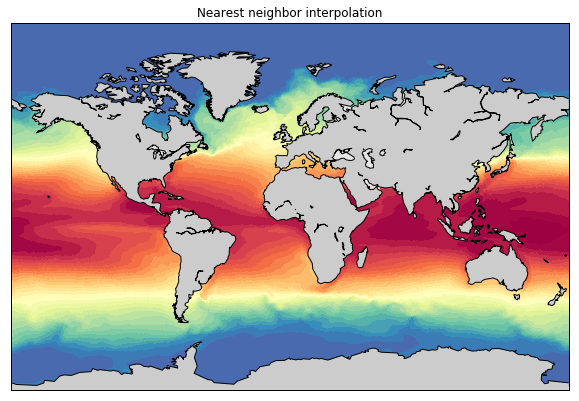

In [9]:
plt.figure(figsize=(10,7))
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
m.fillcontinents()

levels = np.arange(-3., 30., 1)
plt.contourf(x, y, nearest, levels = levels, \
                cmap=cm.Spectral_r, extend='both', zlev=0);
plt.title('Nearest neighbor interpolation');

We can make the same plot with inverce distance interpolation. You can specify how many points you yould like to take in to account (*k*).

In [10]:
idist = pf.fesom2regular(level_data, mesh, lons, lats, how='idist', k=10)

/mnt/lustre01/work/ab0995/a270088/miniconda2/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/mnt/lustre01/work/ab0995/a270088/miniconda2/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:
/mnt/lustre01/work/ab0995/a270088/miniconda2/envs/py35/lib/python3.5/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'zlev'
  s)


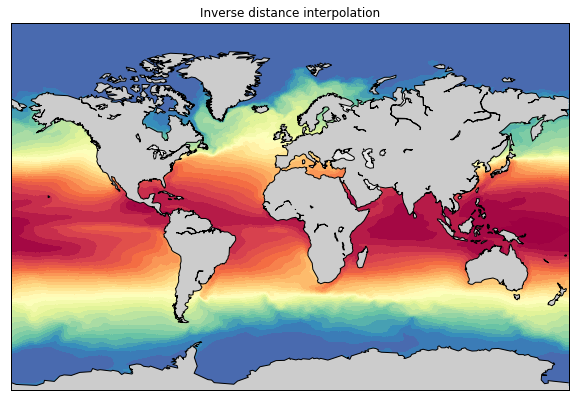

In [11]:
plt.figure(figsize=(10,7))
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
m.fillcontinents()

levels = np.arange(-3., 30., 1)
plt.contourf(x, y, idist, levels = levels, \
                cmap=cm.Spectral_r, extend='both', zlev=0);
plt.title('Inverse distance interpolation');

Comparison with plot on original grid and difference between interpolations.

/mnt/lustre01/work/ab0995/a270088/miniconda2/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/mnt/lustre01/work/ab0995/a270088/miniconda2/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:
/mnt/lustre01/work/ab0995/a270088/miniconda2/envs/py35/lib/python3.5/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'zlev'
  s)


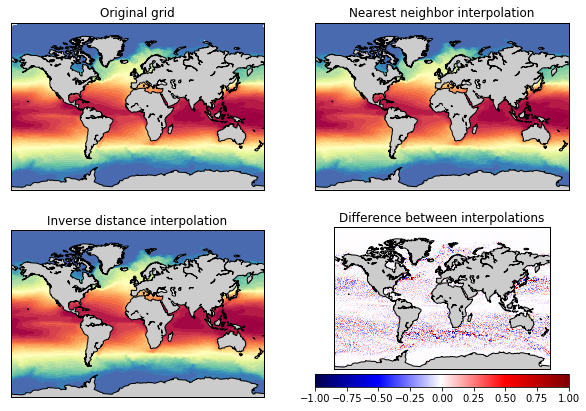

In [12]:
plt.figure(figsize=(10,7))
plt.subplot(221)
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
m.fillcontinents()

levels = np.arange(-3., 30., 1)
plt.tricontourf(x_tri, y_tri, elem_no_nan[::], level_data, levels = levels, \
                cmap=cm.Spectral_r, extend='both')
plt.title('Original grid');

plt.subplot(222)
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
m.fillcontinents()

levels = np.arange(-3., 30., 1)
plt.contourf(x, y, nearest, levels = levels, \
                cmap=cm.Spectral_r, extend='both', zlev=0);
plt.title('Nearest neighbor interpolation');

plt.subplot(223)
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
m.fillcontinents()

levels = np.arange(-3., 30., 1)
plt.contourf(x, y, idist, levels = levels, \
                cmap=cm.Spectral_r, extend='both', zlev=0);
plt.title('Inverse distance interpolation');

plt.subplot(224)
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
m.fillcontinents()

levels = np.arange(-2., 2.1, 0.1)
plt.pcolormesh(x, y, nearest-idist, \
                cmap=cm.seismic,  vmin=-1, vmax=1);
plt.title('Difference between interpolations');
plt.colorbar(orientation='horizontal', pad=0.03);

## Faster interpolation for multiple fields

The way function *fesom2regular* works is actually quite slow if you have to interpolate several fields (e.g. every timestep or every vertical level).

In [13]:
%%time
nearest_slow = pf.fesom2regular(level_data, mesh, lons, lats, how='nn')

CPU times: user 3.55 s, sys: 104 ms, total: 3.65 s
Wall time: 2.67 s


This is because the k-tree and indexes for interpolation are calculated every time in the function call. You can avoid it by precalculating indexes and providing distances and indexes directly. 

In [14]:
distances, inds = pf.create_indexes_and_distances(mesh, lons, lats,\
                                                k=10, n_jobs=2)

In [15]:
%%time
nearest_fast = pf.fesom2regular(level_data, mesh, lons, lats, distances=distances,\
                               inds=inds)

CPU times: user 617 ms, sys: 384 ms, total: 1 s
Wall time: 997 ms


So you get a good boost. Not bad.

It's even more important when you calculate distance weighted interpolation with large numbers of neighbors.

In [16]:
%%time
idist_slow = pf.fesom2regular(level_data, mesh, lons, lats, how='idist', k=20)

CPU times: user 6.84 s, sys: 863 ms, total: 7.7 s
Wall time: 5.53 s


In [17]:
distances, inds = pf.create_indexes_and_distances(mesh, lons, lats,\
                                                k=20, n_jobs=2)

In [18]:
%%time
idist_fast = pf.fesom2regular(level_data, mesh, lons, lats, distances=distances,\
                               inds=inds)

CPU times: user 1.11 s, sys: 703 ms, total: 1.81 s
Wall time: 1.81 s


## Interpolation over a region

One should not nessesarelly interpolate over the whole globe. When you would like to look at the specific region with higher (or lower) spatiall resolution, just generate the mesh for this region.

In [19]:
lon_small = np.linspace(-30, 30, 30)
lat_small = np.linspace(30, 70, 30)
lons_small, lats_small = np.meshgrid(lon_small,lat_small)

Interpolation with both methods

In [20]:
idist_small = pf.fesom2regular(level_data, mesh, lons_small, lats_small, how='idist', k=10)
nearest_small = pf.fesom2regular(level_data, mesh, lons_small, lats_small, how='nn', k=10)

And finally the figure:

In [21]:
ms = Basemap(projection='merc',llcrnrlat=30,urcrnrlat=70,\
            llcrnrlon=-30,urcrnrlon=30,lat_ts=20,resolution='l')

x_small, y_small = ms(lons_small, lats_small)
x2_small, y2_small = ms(mesh.x2, mesh.y2)

/mnt/lustre01/work/ab0995/a270088/miniconda2/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/mnt/lustre01/work/ab0995/a270088/miniconda2/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


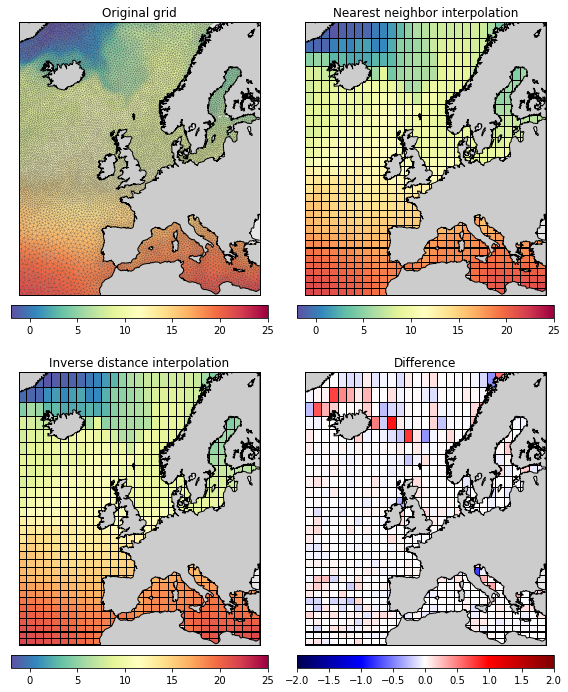

In [22]:
plt.figure(figsize=(8,10))

plt.subplot(221)
ms.drawmapboundary(fill_color='0.9')
ms.drawcoastlines()
ms.fillcontinents()

levels = np.arange(-2., 25., 1)
# plt.tricontourf(x2_small, y2_small, elem_no_nan[::], level_data, levels = levels, \
#                 cmap=cm.Spectral_r, extend='both')
plt.tripcolor(x2_small, y2_small, elem_no_nan, \
              level_data, \
              edgecolors='k',\
              lw = 0.1,
             cmap=cm.Spectral_r,
             vmin = -2,
             vmax = 25)

plt.title('Original grid');
plt.colorbar(orientation = 'horizontal', pad = 0.03)


plt.subplot(222)
ms.drawmapboundary(fill_color='0.9')
ms.drawcoastlines()
ms.fillcontinents()

plt.pcolormesh(x_small, y_small, nearest_small, \
                cmap=cm.Spectral_r, edgecolors='k', lw=0.01, vmin = -2, vmax=25 );
plt.title('Nearest neighbor interpolation');
plt.colorbar(orientation = 'horizontal', pad = 0.03)

plt.subplot(223)
ms.drawmapboundary(fill_color='0.9')
ms.drawcoastlines()
ms.fillcontinents()

plt.pcolormesh(x_small, y_small, idist_small, \
                cmap=cm.Spectral_r, edgecolors='k', lw=0.01, vmin = -2, vmax=25  );
plt.title('Inverse distance interpolation');
plt.colorbar(orientation = 'horizontal', pad = 0.03)

plt.subplot(224)
ms.drawmapboundary(fill_color='0.9')
ms.drawcoastlines()
ms.fillcontinents()

plt.pcolormesh(x_small, y_small, idist_small- nearest_small, \
                cmap=cm.seismic, edgecolors='k', lw=0.01, vmin = -2, vmax=2 );
plt.title('Difference');
plt.colorbar(orientation = 'horizontal', pad = 0.03)

plt.tight_layout()

## More interpolation methods

### regular2regular

In [23]:
lon = np.linspace(-180, 180, 1440)
lat = np.linspace(-90, 90, 720)
lons, lats = np.meshgrid(lon,lat)

In [24]:
w = pf.climatology(basedir+'/climatology/')

/mnt/lustre01/work/ab0995/a270088/miniconda2/envs/py35/lib/python3.5/site-packages/seawater/eos80.py:100: RuntimeWarning: overflow encountered in multiply
  (d[0] + d[1] * T68) * (s - 35)) * p +
/mnt/lustre01/work/ab0995/a270088/miniconda2/envs/py35/lib/python3.5/site-packages/seawater/eos80.py:100: RuntimeWarning: invalid value encountered in multiply
  (d[0] + d[1] * T68) * (s - 35)) * p +
/mnt/lustre01/work/ab0995/a270088/miniconda2/envs/py35/lib/python3.5/site-packages/seawater/eos80.py:100: RuntimeWarning: invalid value encountered in add
  (d[0] + d[1] * T68) * (s - 35)) * p +
../pyfesom/climatology.py:76: RuntimeWarning: Mean of empty slice
  self.Tyz=nanmean(self.T, 2)


In [25]:
lonc, latc = np.meshgrid(w.x, w.y)

In [26]:
odata = pf.regular2regular(w.T[0,:,:], lonc, latc, lons, lats, distances=None, \
                  inds=None, how='nn', k=10, radius_of_influence=100000, n_jobs = 2)

In [27]:
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
x,y = m(lons,lats) # coordinates for target grid

/mnt/lustre01/work/ab0995/a270088/miniconda2/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/mnt/lustre01/work/ab0995/a270088/miniconda2/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:
/mnt/lustre01/work/ab0995/a270088/miniconda2/envs/py35/lib/python3.5/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'zlev'
  s)


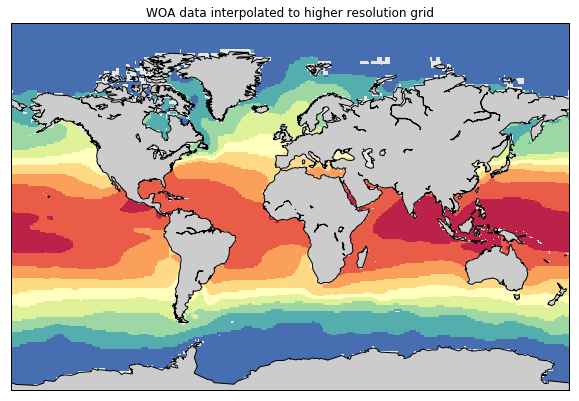

In [28]:
plt.figure(figsize=(10,7))
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
m.fillcontinents()

levels = np.arange(-3., 30., 1)
plt.contourf(x, y, odata, \
                cmap=cm.Spectral_r, extend='both', zlev=0);
plt.title('WOA data interpolated to higher resolution grid');

## fesom2clim

Covered in the "compare_to_climatology" notebook

## clim2refular

In [29]:
xx, yy, odata2 = pf.clim2regular(w, 'T', lons, lats, \
                 levels=[0], verbose=True, radius_of_influence=100000)

interpolating to level: 0
Upper level: 0.0
Lower level: 10.0


In [30]:
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
x,y = m(lons,lats) # coordinates for target grid

/mnt/lustre01/work/ab0995/a270088/miniconda2/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/mnt/lustre01/work/ab0995/a270088/miniconda2/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:
/mnt/lustre01/work/ab0995/a270088/miniconda2/envs/py35/lib/python3.5/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'zlev'
  s)


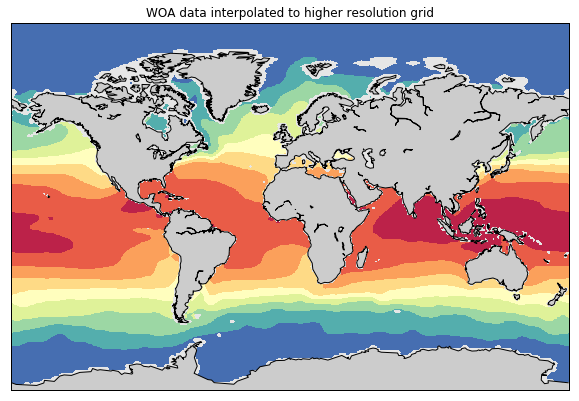

In [31]:
plt.figure(figsize=(10,7))
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
m.fillcontinents()

levels = np.arange(-3., 30., 1)
plt.contourf(x, y, odata2[0,:,:], \
                cmap=cm.Spectral_r, extend='both', zlev=0);
plt.title('WOA data interpolated to higher resolution grid');

## fesom2fesom

### Standard option

You would need another fesom mesh, the one you whant to interpolate to.

In [32]:
mesh_target = pf.load_mesh('/mnt/lustre01/work/ab0995/a270088/data/bol_mesh', abg = [0,0,0], usepickle=True)

/mnt/lustre01/work/ab0995/a270088/data/bol_mesh/pickle_mesh_py3
3
The usepickle == True)
The pickle file for python 3 exists.
The mesh will be loaded from /mnt/lustre01/work/ab0995/a270088/data/bol_mesh/pickle_mesh_py3


In [33]:
level_data, elem_no_nan = pf.get_data(fl.variables['temp'][:,:].mean(axis=0),mesh,0)

For depth 0 model level -0.0 will be used


In [34]:
data_on_other_mesh, elem_no_nan2 = pf.fesom2fesom(level_data, mesh, mesh_target, distances=None, \
                  inds=None, how='nn', k=10, radius_of_influence=100000, n_jobs = 2)

In [35]:
m = Basemap(projection='robin',lon_0=0, resolution='c')
x, y = m(mesh_target.x2, mesh_target.y2)

/mnt/lustre01/work/ab0995/a270088/miniconda2/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


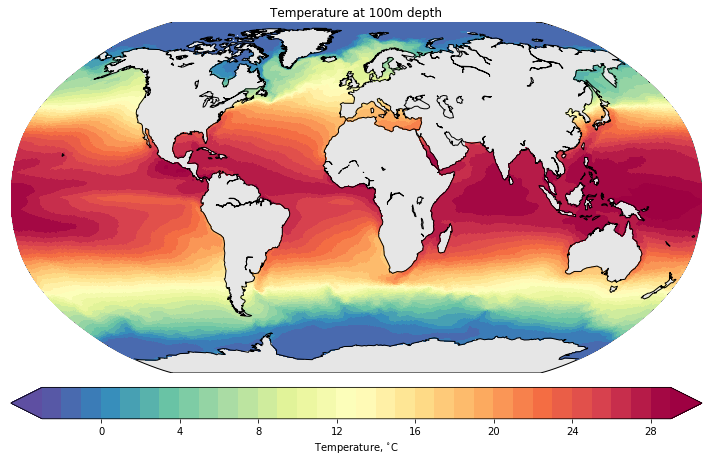

In [36]:
plt.figure(figsize=(10,7))
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()

levels = np.arange(-3., 30., 1)
plt.tricontourf(x, y,elem_no_nan2,  data_on_other_mesh, levels = levels, \
                cmap=cm.Spectral_r, extend='both')
# plt.tripcolor(x, y,elem_no_nan2,  data_on_other_mesh, \
#                 cmap=cm.Spectral_r, )
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
cbar.set_label("Temperature, $^{\circ}$C")
plt.title('Temperature at 100m depth')
plt.tight_layout()

### Polar option

If you would like to do polar plots, then you don't need to remove cyclic points. The same is true if you would like to analyse data someshow - this way you will get all the data. Use `polar = True` option.

In [37]:
data_on_other_mesh, elem_no_nan2 = pf.fesom2fesom(level_data, mesh, mesh_target, distances=None, \
                  inds=None, how='nn', k=10, radius_of_influence=100000, n_jobs = 2, polar = True)

In [38]:
m = Basemap(projection='npstere',boundinglat=60,lon_0=0, resolution='c')
x, y = m(mesh_target.x2, mesh_target.y2)

/mnt/lustre01/work/ab0995/a270088/miniconda2/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/mnt/lustre01/work/ab0995/a270088/miniconda2/envs/py35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


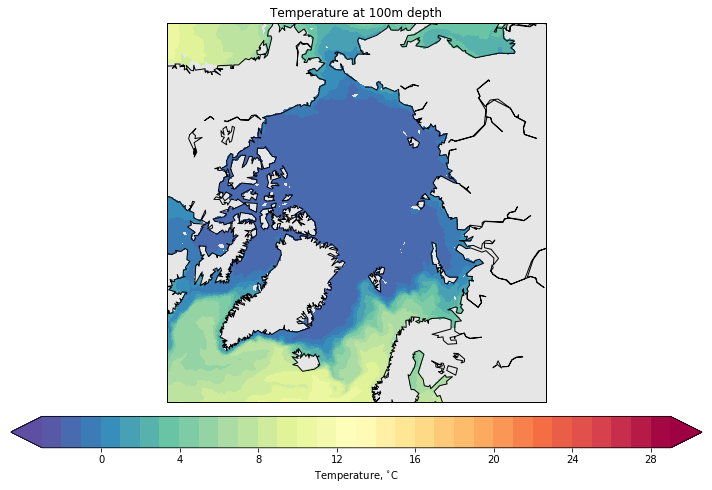

In [39]:
plt.figure(figsize=(10,7))
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()

levels = np.arange(-3., 30., 1)
plt.tricontourf(x, y,elem_no_nan2,  data_on_other_mesh, levels = levels, \
                cmap=cm.Spectral_r, extend='both')
# plt.tripcolor(x, y,elem_no_nan2,  data_on_other_mesh, \
#                 cmap=cm.Spectral_r, )
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
cbar.set_label("Temperature, $^{\circ}$C")
plt.title('Temperature at 100m depth')
plt.tight_layout()